In [3]:
import math
def count_divisions(x):
    base = 2
    num = math.log(1000/x, base)
    return num

In [4]:
import matplotlib.pyplot as plt 
def plot_size_distribution(sizes, counts):
    maxium = max(sizes)
    minium = min(sizes)
    min_division = count_divisions(maxium)
    max_division = count_divisions(minium)
    dictionary = {}
    i = min_division
    start_size = maxium
    while i < max_division:
        dictionary[start_size] = 0
        start_size = start_size/2
        i += 1
    rounded_values = [min(list(dictionary.keys()), key=lambda x: abs(x - value)) for value in sizes]
    for i in range(len(rounded_values)):
        dictionary[rounded_values[i]] += counts[i]
    keys = list(dictionary.keys())
    values = list(dictionary.values())
    print("sizes: ", keys)
    print("counts: ", values)
    plt.plot(keys, values, marker='o', linestyle='-')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Node Size')
    plt.ylabel('Probability')
    plt.title('Size Distribution of ice floes')
    plt.show()

def log_binning_plot(sizes, counts, x):
    maxium = max(sizes)
    minium = min(sizes)
    min_division = count_divisions(maxium)
    max_division = count_divisions(minium)
    dictionary = {}
    i = min_division
    start_size = maxium
    while i < max_division:
        dictionary[start_size] = 0
        start_size = start_size/2
        i += 1
    rounded_values = [min(list(dictionary.keys()), key=lambda x: abs(x - value)) for value in sizes]
    for i in range(len(rounded_values)):
        dictionary[rounded_values[i]] += counts[i]
    keys = list(dictionary.keys())
    values = list(dictionary.values())
    
    combined_values = {}
    for i in range(len(keys) - x + 1):
        nearby_keys = keys[i:i + x]
        nearby_values = values[i:i + x]

        combined_value = sum(nearby_values)
        middle_key = nearby_keys[x // 2]
        combined_values[middle_key] = combined_value
    sizes = list(combined_values.keys())
    counts = list(combined_values.values())
    
    print("sizes: ", sizes)
    print("counts: ",counts)
    plt.plot(sizes, counts, marker='o', linestyle='-')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Node Size')
    plt.ylabel('Probability')
    plt.title('Binned Size Distribution of ice floes')
    plt.show()
        
def binning_plot(sizes, counts, binsize):
    bins = {}
    maxium = max(sizes)
    if maxium % binsize == 0:
        num = maxium//binsize  ## ex: 5%5=0 and 5 is under 1~5
    else:
        num = maxium//binsize +1 
    for i in range(int(num)):
        size = i * binsize 
        bins[size] = 0
    for i in range(len(sizes)):
        value = sizes[i]
        floe_count = counts[i]
        # count which bins the value should be in
        if value % binsize == 0:
            bin_num = value//binsize  ## ex: 5%5=0 and 5 is under 1~5
        else:
            bin_num = value//binsize +1 ## ex: 3%5=3, 3//5 = 0 and 3 is under 1~5
        size = bin_num * binsize
        if size not in bins:
            bins[size] = floe_count
        else:
            bins[size] += floe_count
    sizes = list(bins.keys())
    sizes.sort()
    counts = [bins[i] for i in sizes]
    print("sizes: ", sizes)
    print("counts: ",counts)
    plt.bar(sizes, counts)
    #plt.plot(sizes, counts, marker='o', linestyle='-')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Node Size')
    plt.ylabel('Probability')
    plt.title('Binned Size Distribution of ice floes')
    plt.show()

In [51]:
def add_three_dicts(dict1, dict2, dict3):
    result_dict = {}
    
    # Iterate over the keys in the first dictionary
    for key in dict1:
        # Check if the key exists in the other dictionaries
        if key in dict2 and key in dict3:
            result_dict[key] = (dict1[key] + dict2[key] + dict3[key])/3
        elif key in dict2:
            result_dict[key] = (dict1[key] + dict2[key])/3
        elif key in dict3:
            result_dict[key] = (dict1[key] + dict3[key])/3
        else:
            result_dict[key] = dict1[key]/3

    # Add keys from the second dictionary that are not already in the result
    for key in dict2:
        if key not in result_dict:
            result_dict[key] = dict2[key]/3

    # Add keys from the third dictionary that are not already in the result
    for key in dict3:
        if key not in result_dict:
            result_dict[key] = dict3[key]/3

    return result_dict


Case 1: splitRate = 0.1, weldRate = 0.03, times = 50,000 <br>
* sizes: [2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 250.0, 500.0]<br> counts: [4, 3, 3, 15, 16, 31, 59, 103, 226, 360, 642, 773, 1004, 1325, 1443, 1361, 1192, 888, 559, 255, 125, 51, 16, 1, 1]<br>
* sizes: [25, 50, 75, 125, 250, 500]<br> counts: [10262, 125, 51, 16, 1, 1]<br>

sizes:  [500.0, 250.0, 125.0, 62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625, 0.00011920928955078125, 5.9604644775390625e-05, 2.9802322387695312e-05]
counts:  [1, 1, 16, 51, 125, 255, 559, 888, 1192, 1361, 1443, 1325, 1004, 773, 642, 360, 226, 103, 59, 31, 16, 15, 3, 3, 4]


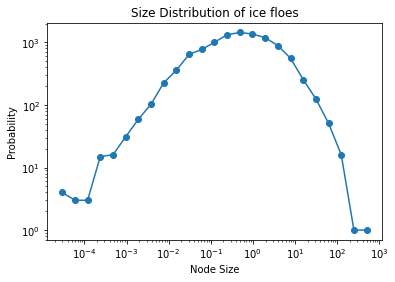

sizes:  [125.0, 62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625, 0.00011920928955078125]
counts:  [194, 448, 1006, 1878, 3019, 4255, 5443, 6209, 6325, 5906, 5187, 4104, 3005, 2104, 1390, 779, 435, 224, 124, 68, 41]


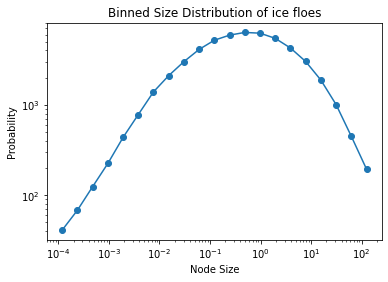

sizes:  [62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625]
counts:  [1008, 1895, 3086, 4431, 5823, 7023, 7772, 7986, 7740, 6908, 5773, 4433, 3167, 2194, 1437, 810, 453, 230, 131]


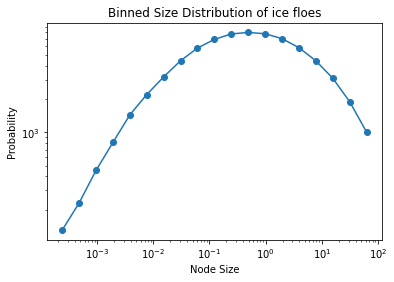

sizes:  [31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125]
counts:  [3088, 4448, 5890, 7199, 8152, 8800, 9187, 8988, 8326, 7237, 5935, 4523, 3214, 2225, 1455, 816, 460]


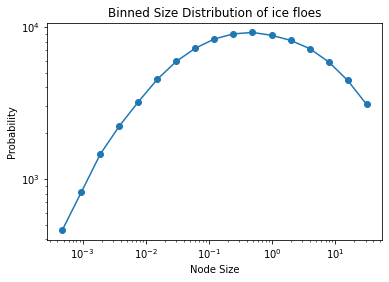

In [46]:
sizes =[2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 250.0, 500.0]
counts = [4, 3, 3, 15, 16, 31, 59, 103, 226, 360, 642, 773, 1004, 1325, 1443, 1361, 1192, 888, 559, 255, 125, 51, 16, 1, 1]
plot_size_distribution(sizes, counts)
log_binning_plot(sizes, counts, 5)
log_binning_plot(sizes, counts, 7)
log_binning_plot(sizes, counts, 9)

Case 2: splitRate = 0.1, weldRate = 0.03, times = 500,000<br>
* sizes: [5.820766E-8, 1.1641532E-7, 2.3283064E-7, 4.656613E-7, 9.313226E-7, 1.8626451E-6, 3.7252903E-6, 7.4505806E-6, 1.4901161E-5, 2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 250.0, 500.0]<br> counts: [8, 6, 10, 45, 80, 145, 254, 470, 752, 1234, 1836, 2914, 4042, 5237, 6600, 7870, 8747, 9597, 9659, 9642, 9304, 7864, 6336, 5129, 3734, 2460, 1544, 769, 307, 132, 54, 8, 2, 1]<br>
* sizes: [25, 50, 75, 125, 250, 500]<br> counts: [106595, 132, 54, 8, 2, 1]<br>


sizes:  [500.0, 250.0, 125.0, 62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625, 0.00011920928955078125, 5.9604644775390625e-05, 2.9802322387695312e-05, 1.4901161193847656e-05, 7.450580596923828e-06, 3.725290298461914e-06, 1.862645149230957e-06, 9.313225746154785e-07, 4.6566128730773926e-07, 2.3283064365386963e-07, 1.1641532182693481e-07, 5.820766091346741e-08]
counts:  [1, 2, 8, 54, 132, 307, 769, 1544, 2460, 3734, 5129, 6336, 7864, 9304, 9642, 9659, 9597, 8747, 7870, 6600, 5237, 4042, 2914, 1836, 1234, 752, 470, 254, 145, 80, 45, 10, 6, 8]


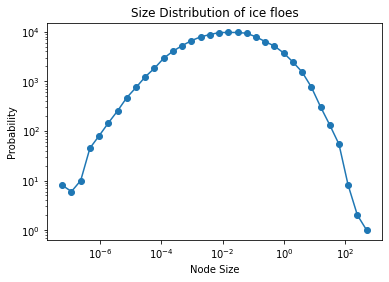

sizes:  [125.0, 62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625, 0.00011920928955078125, 5.9604644775390625e-05, 2.9802322387695312e-05, 1.4901161193847656e-05, 7.450580596923828e-06, 3.725290298461914e-06, 1.862645149230957e-06, 9.313225746154785e-07, 4.6566128730773926e-07, 2.3283064365386963e-07]
counts:  [197, 503, 1270, 2806, 5212, 8814, 13636, 19203, 25523, 32367, 38275, 42805, 46066, 46949, 45515, 42473, 38051, 32496, 26663, 20629, 15263, 10778, 7206, 4546, 2855, 1701, 994, 534, 286, 149]


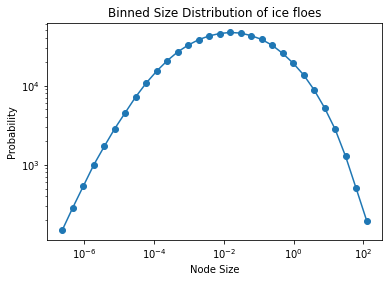

sizes:  [62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625, 0.00011920928955078125, 5.9604644775390625e-05, 2.9802322387695312e-05, 1.4901161193847656e-05, 7.450580596923828e-06, 3.725290298461914e-06, 1.862645149230957e-06, 9.313225746154785e-07, 4.6566128730773926e-07]
counts:  [1273, 2816, 5274, 9000, 14075, 20279, 27836, 36371, 44469, 51668, 57531, 61149, 62683, 61419, 57352, 51752, 45007, 37246, 29733, 22615, 16485, 11502, 7605, 4771, 2980, 1756, 1010, 548]


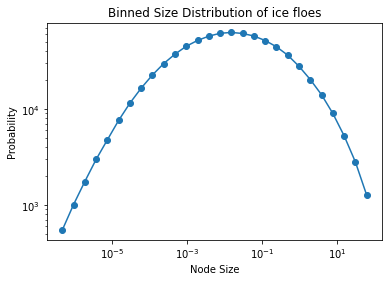

sizes:  [31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625, 0.00011920928955078125, 5.9604644775390625e-05, 2.9802322387695312e-05, 1.4901161193847656e-05, 7.450580596923828e-06, 3.725290298461914e-06, 1.862645149230957e-06, 9.313225746154785e-07]
counts:  [5277, 9010, 14137, 20465, 28275, 37447, 46782, 55672, 63725, 70012, 74148, 75619, 74520, 70698, 64308, 56502, 48077, 39232, 30955, 23339, 16884, 11727, 7730, 4826, 2996, 1770]


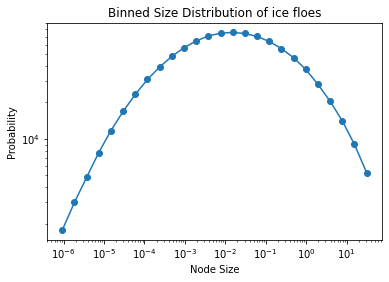

In [47]:
sizes =  [5.820766E-8, 1.1641532E-7, 2.3283064E-7, 4.656613E-7, 9.313226E-7, 1.8626451E-6, 3.7252903E-6, 7.4505806E-6, 1.4901161E-5, 2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 250.0, 500.0]
counts = [8, 6, 10, 45, 80, 145, 254, 470, 752, 1234, 1836, 2914, 4042, 5237, 6600, 7870, 8747, 9597, 9659, 9642, 9304, 7864, 6336, 5129, 3734, 2460, 1544, 769, 307, 132, 54, 8, 2, 1]
plot_size_distribution(sizes, counts)
log_binning_plot(sizes, counts, 5)
log_binning_plot(sizes, counts, 7)
log_binning_plot(sizes, counts, 9)

Case 3: splitRate = 0.1, weldRate = 0.03, times = 5,000,000<br>
* sizes: [4.5474735E-10, 9.094947E-10, 1.8189894E-9, 3.6379788E-9, 7.2759576E-9, 1.4551915E-8, 2.910383E-8, 5.820766E-8, 1.1641532E-7, 2.3283064E-7, 4.656613E-7, 9.313226E-7, 1.8626451E-6, 3.7252903E-6, 7.4505806E-6, 1.4901161E-5, 2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 500.0]<br> counts: [4, 15, 24, 65, 190, 324, 602, 858, 1514, 2729, 4487, 6956, 10451, 15858, 22093, 30690, 40262, 51057, 62687, 74586, 85460, 91954, 95726, 93498, 87708, 76964, 62582, 48106, 33243, 21496, 12776, 7256, 3649, 1685, 898, 440, 165, 56, 10, 1]<br>
* sizes: [3.6379788E-9, 7.2759576E-9, 1.4551915E-8, 2.910383E-8, 5.820766E-8, 1.1641532E-7, 2.3283064E-7, 4.656613E-7, 9.313226E-7, 1.8626451E-6, 3.7252903E-6, 7.4505806E-6, 1.4901161E-5, 2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 250.0]<br>counts: [8, 18, 79, 67, 114, 334, 652, 1342, 2506, 4686, 7960, 13112, 19020, 28108, 39543, 53280, 67400, 80182, 91522, 99808, 102196, 97924, 88300, 75992, 60092, 44502, 30330, 18726, 10701, 5698, 2655, 1190, 508, 165, 48, 16, 2]<br>
* sizes: [7.2759576E-9, 1.4551915E-8, 2.910383E-8, 5.820766E-8, 1.1641532E-7, 2.3283064E-7, 4.656613E-7, 9.313226E-7, 1.8626451E-6, 3.7252903E-6, 7.4505806E-6, 1.4901161E-5, 2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 250.0]<br>
counts: [12, 41, 117, 240, 476, 940, 1779, 3292, 5557, 8953, 13743, 19943, 28702, 40258, 52422, 65672, 78801, 89333, 96851, 99021, 95368, 87398, 75361, 61978, 47150, 32419, 21449, 12506, 6620, 3110, 1261, 521, 196, 55, 15, 1]<br>


sizes:  [500.0, 250.0, 125.0, 62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625, 0.00011920928955078125, 5.9604644775390625e-05, 2.9802322387695312e-05, 1.4901161193847656e-05, 7.450580596923828e-06, 3.725290298461914e-06, 1.862645149230957e-06, 9.313225746154785e-07, 4.6566128730773926e-07, 2.3283064365386963e-07, 1.1641532182693481e-07, 5.820766091346741e-08, 2.9103830456733704e-08, 1.4551915228366852e-08, 7.275957614183426e-09, 3.637978807091713e-09, 1.8189894035458565e-09, 9.094947017729282e-10, 4.547473508864641e-10]
counts:  [0.3333333333333333, 0.6666666666666666, 13.666666666666666, 53.0, 175.33333333333334, 489.6666666666667, 1116.3333333333333, 2483.3333333333335, 5322.333333333333, 10154.333333333334, 17650.333333333332, 28081.666666666668, 41631.666666666664, 

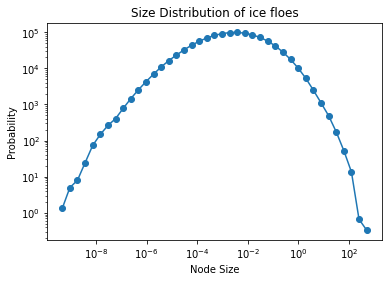

sizes:  [125.0, 62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625, 0.00011920928955078125, 5.9604644775390625e-05, 2.9802322387695312e-05, 1.4901161193847656e-05, 7.450580596923828e-06, 3.725290298461914e-06, 1.862645149230957e-06, 9.313225746154785e-07, 4.6566128730773926e-07, 2.3283064365386963e-07, 1.1641532182693481e-07, 5.820766091346741e-08, 2.9103830456733704e-08, 1.4551915228366852e-08, 7.275957614183426e-09, 3.637978807091713e-09, 1.8189894035458565e-09]
counts:  [243.0, 732.3333333333334, 1848.0, 4317.666666666667, 9587.0, 19566.0, 36726.66666666667, 63692.0, 102840.33333333334, 154243.33333333334, 215400.6666666667, 281971.0, 347556.00000000006, 404162.6666666667, 444899.0, 464523.6666666667, 461784.0, 437336.6666666666, 395228.0, 341385.6666666666, 282806.6666

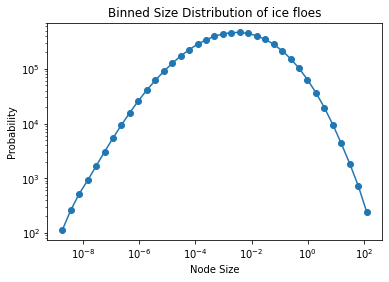

sizes:  [3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625, 0.00011920928955078125, 5.9604644775390625e-05, 2.9802322387695312e-05, 1.4901161193847656e-05, 7.450580596923828e-06, 3.725290298461914e-06, 1.862645149230957e-06, 9.313225746154785e-07, 4.6566128730773926e-07, 2.3283064365386963e-07, 1.1641532182693481e-07, 5.820766091346741e-08, 2.9103830456733704e-08]
counts:  [163898.0, 235209.33333333337, 319429.3333333334, 413082.3333333334, 511267.6666666667, 608554.0, 699000.6666666667, 779365.3333333334, 846101.3333333335, 896908.6666666667, 930373.6666666667, 945080.6666666667, 940216.6666666667, 914901.0000000001, 869099.3333333334, 804685.6666666667, 724716.3333333334, 633585.6666666666, 536787.6666666667, 440100.6666666666, 349568.3333333333, 268349.3333333333, 199278.0, 143221.6666666667, 9962

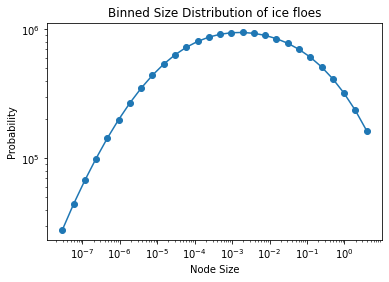

sizes:  [0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625, 0.00011920928955078125, 5.9604644775390625e-05, 2.9802322387695312e-05, 1.4901161193847656e-05, 7.450580596923828e-06, 3.725290298461914e-06, 1.862645149230957e-06, 9.313225746154785e-07, 4.6566128730773926e-07]
counts:  [781214.3333333334, 850433.3333333335, 906562.3333333334, 950168.0000000001, 982472.3333333335, 1005514.6666666667, 1021341.0000000001, 1031148.3333333334, 1035563.0000000001, 1034492.0000000001, 1026873.6666666667, 1010663.6666666667, 983356.6666666667, 942129.0000000001, 885665.6666666667, 814502.0000000001, 730354.6666666667, 636712.3333333334, 538482.0000000001, 441025.33333333326, 350090.33333333326]


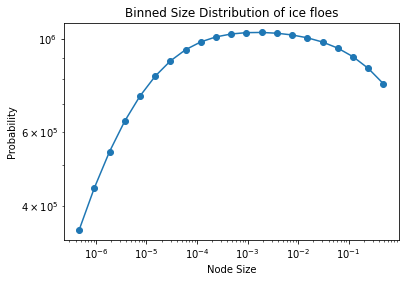

In [54]:
sizes =  [4.5474735E-10, 9.094947E-10, 1.8189894E-9, 3.6379788E-9, 7.2759576E-9, 1.4551915E-8, 2.910383E-8, 5.820766E-8, 1.1641532E-7, 2.3283064E-7, 4.656613E-7, 9.313226E-7, 1.8626451E-6, 3.7252903E-6, 7.4505806E-6, 1.4901161E-5, 2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 500.0]
counts = [4, 15, 24, 65, 190, 324, 602, 858, 1514, 2729, 4487, 6956, 10451, 15858, 22093, 30690, 40262, 51057, 62687, 74586, 85460, 91954, 95726, 93498, 87708, 76964, 62582, 48106, 33243, 21496, 12776, 7256, 3649, 1685, 898, 440, 165, 56, 10, 1]
dict1 = dict(zip(sizes, counts))
sizes = [3.6379788E-9, 7.2759576E-9, 1.4551915E-8, 2.910383E-8, 5.820766E-8, 1.1641532E-7, 2.3283064E-7, 4.656613E-7, 9.313226E-7, 1.8626451E-6, 3.7252903E-6, 7.4505806E-6, 1.4901161E-5, 2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 250.0]
counts =  [8, 18, 79, 67, 114, 334, 652, 1342, 2506, 4686, 7960, 13112, 19020, 28108, 39543, 53280, 67400, 80182, 91522, 99808, 102196, 97924, 88300, 75992, 60092, 44502, 30330, 18726, 10701, 5698, 2655, 1190, 508, 165, 48, 16, 2]
dict2 = dict(zip(sizes, counts))
sizes= [7.2759576E-9, 1.4551915E-8, 2.910383E-8, 5.820766E-8, 1.1641532E-7, 2.3283064E-7, 4.656613E-7, 9.313226E-7, 1.8626451E-6, 3.7252903E-6, 7.4505806E-6, 1.4901161E-5, 2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 250.0]
counts= [12, 41, 117, 240, 476, 940, 1779, 3292, 5557, 8953, 13743, 19943, 28702, 40258, 52422, 65672, 78801, 89333, 96851, 99021, 95368, 87398, 75361, 61978, 47150, 32419, 21449, 12506, 6620, 3110, 1261, 521, 196, 55, 15, 1]
dict3 = dict(zip(sizes, counts))
result = add_three_dicts(dict1, dict2, dict3)
sizes = list(result.keys())
counts = list(result.values())
plot_size_distribution(sizes, counts)
log_binning_plot(sizes, counts, 5)
log_binning_plot(sizes, counts, 14)
log_binning_plot(sizes, counts, 21)

sizes:  [500.0, 250.0, 125.0, 62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625, 0.00011920928955078125, 5.9604644775390625e-05, 2.9802322387695312e-05, 1.4901161193847656e-05, 7.450580596923828e-06, 3.725290298461914e-06, 1.862645149230957e-06, 9.313225746154785e-07, 4.6566128730773926e-07, 2.3283064365386963e-07, 1.1641532182693481e-07, 5.820766091346741e-08, 2.9103830456733704e-08, 1.4551915228366852e-08, 7.275957614183426e-09, 3.637978807091713e-09, 1.8189894035458565e-09, 9.094947017729282e-10, 4.547473508864641e-10]
counts:  [1, 0, 10, 56, 165, 440, 898, 1685, 3649, 7256, 12776, 21496, 33243, 48106, 62582, 76964, 87708, 93498, 95726, 91954, 85460, 74586, 62687, 51057, 40262, 30690, 22093, 15858, 10451, 6956, 4487, 2729, 1514, 858, 602, 324, 190, 65, 24, 15, 4]


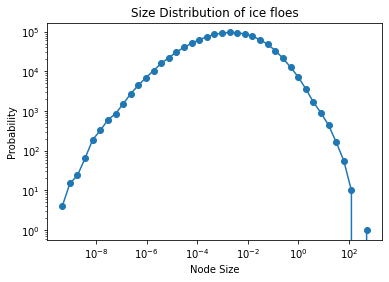

sizes:  [125.0, 62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625, 0.00011920928955078125, 5.9604644775390625e-05, 2.9802322387695312e-05, 1.4901161193847656e-05, 7.450580596923828e-06, 3.725290298461914e-06, 1.862645149230957e-06, 9.313225746154785e-07, 4.6566128730773926e-07, 2.3283064365386963e-07, 1.1641532182693481e-07, 5.820766091346741e-08, 2.9103830456733704e-08, 1.4551915228366852e-08, 7.275957614183426e-09, 3.637978807091713e-09, 1.8189894035458565e-09]
counts:  [232, 671, 1569, 3244, 6837, 13928, 26264, 46862, 78420, 122877, 178203, 242391, 308603, 368858, 416478, 445850, 454346, 441224, 410413, 365744, 314052, 259282, 206789, 159960, 119354, 86048, 59845, 40481, 26137, 16544, 10190, 6027, 3488, 2039, 1205, 618, 298]


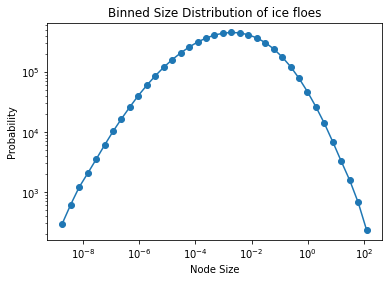

sizes:  [62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625, 0.00011920928955078125, 5.9604644775390625e-05, 2.9802322387695312e-05, 1.4901161193847656e-05, 7.450580596923828e-06, 3.725290298461914e-06, 1.862645149230957e-06, 9.313225746154785e-07, 4.6566128730773926e-07, 2.3283064365386963e-07, 1.1641532182693481e-07, 5.820766091346741e-08, 2.9103830456733704e-08, 1.4551915228366852e-08, 7.275957614183426e-09, 3.637978807091713e-09]
counts:  [1570, 3254, 6903, 14149, 26869, 48200, 81003, 128211, 189108, 262423, 342875, 423597, 497827, 556538, 593892, 605896, 591619, 554968, 501732, 436696, 366835, 297233, 233098, 177367, 130797, 93264, 64088, 42853, 27597, 17470, 10704, 6282, 3577, 2078, 1224]


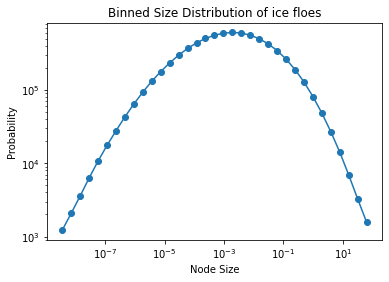

sizes:  [31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625, 0.00011920928955078125, 5.9604644775390625e-05, 2.9802322387695312e-05, 1.4901161193847656e-05, 7.450580596923828e-06, 3.725290298461914e-06, 1.862645149230957e-06, 9.313225746154785e-07, 4.6566128730773926e-07, 2.3283064365386963e-07, 1.1641532182693481e-07, 5.820766091346741e-08, 2.9103830456733704e-08, 1.4551915228366852e-08, 7.275957614183426e-09]
counts:  [6904, 14159, 26935, 48421, 81608, 129549, 191691, 267757, 353780, 443629, 532099, 611277, 675241, 716584, 731165, 719640, 682938, 625920, 554515, 474647, 393144, 314640, 244541, 184583, 135040, 95636, 65548, 43779, 28111, 17725, 10793, 6321, 3596]


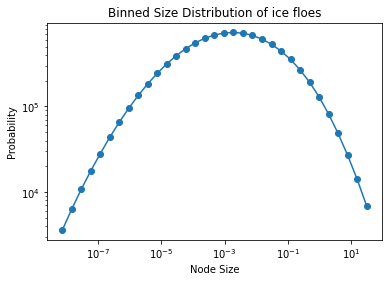

In [48]:
sizes = [4.5474735E-10, 9.094947E-10, 1.8189894E-9, 3.6379788E-9, 7.2759576E-9, 1.4551915E-8, 2.910383E-8, 5.820766E-8, 1.1641532E-7, 2.3283064E-7, 4.656613E-7, 9.313226E-7, 1.8626451E-6, 3.7252903E-6, 7.4505806E-6, 1.4901161E-5, 2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 500.0]
counts = [4, 15, 24, 65, 190, 324, 602, 858, 1514, 2729, 4487, 6956, 10451, 15858, 22093, 30690, 40262, 51057, 62687, 74586, 85460, 91954, 95726, 93498, 87708, 76964, 62582, 48106, 33243, 21496, 12776, 7256, 3649, 1685, 898, 440, 165, 56, 10, 1]
plot_size_distribution(sizes, counts)
log_binning_plot(sizes, counts, 5)
log_binning_plot(sizes, counts, 7)
log_binning_plot(sizes, counts, 9)

Case 4: splitRate = 0.7, weldRate = 0.1, times = 500,000<br>
* sizes: [1.4551915E-8, 2.910383E-8, 5.820766E-8, 1.1641532E-7, 2.3283064E-7, 4.656613E-7, 9.313226E-7, 1.8626451E-6, 3.7252903E-6, 7.4505806E-6, 1.4901161E-5, 2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 250.0]<br> counts: [4, 31, 128, 218, 485, 927, 1374, 2366, 4018, 6142, 10058, 15636, 22484, 31560, 43806, 55740, 69136, 80722, 87367, 90311, 88331, 80708, 67226, 52798, 37693, 24672, 14481, 7646, 3420, 1445, 551, 133, 51, 18, 1]
* sizes: [25, 50, 75, 125, 250] <br> counts: [901484, 133, 51, 18, 1]<br>

sizes:  [250.0, 125.0, 62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625, 0.00011920928955078125, 5.9604644775390625e-05, 2.9802322387695312e-05, 1.4901161193847656e-05, 7.450580596923828e-06, 3.725290298461914e-06, 1.862645149230957e-06, 9.313225746154785e-07, 4.6566128730773926e-07, 2.3283064365386963e-07, 1.1641532182693481e-07, 5.820766091346741e-08, 2.9103830456733704e-08, 1.4551915228366852e-08]
counts:  [1, 18, 51, 133, 551, 1445, 3420, 7646, 14481, 24672, 37693, 52798, 67226, 80708, 88331, 90311, 87367, 80722, 69136, 55740, 43806, 31560, 22484, 15636, 10058, 6142, 4018, 2366, 1374, 927, 485, 218, 128, 31, 4]


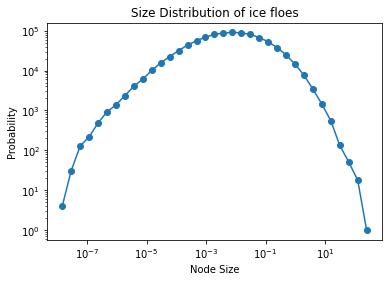

sizes:  [62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625, 0.00011920928955078125, 5.9604644775390625e-05, 2.9802322387695312e-05, 1.4901161193847656e-05, 7.450580596923828e-06, 3.725290298461914e-06, 1.862645149230957e-06, 9.313225746154785e-07, 4.6566128730773926e-07, 2.3283064365386963e-07, 1.1641532182693481e-07, 5.820766091346741e-08]
counts:  [754, 2198, 5600, 13195, 27543, 51664, 87912, 137290, 196870, 263097, 326756, 379374, 413943, 427439, 415867, 383276, 336771, 280964, 222726, 169226, 123544, 85880, 58338, 38220, 23958, 14827, 9170, 5370, 3132, 1789, 866]


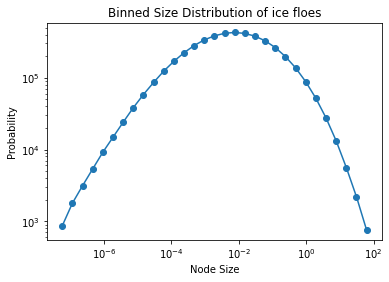

sizes:  [3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625, 0.00011920928955078125, 5.9604644775390625e-05, 2.9802322387695312e-05, 1.4901161193847656e-05, 7.450580596923828e-06, 3.725290298461914e-06, 1.862645149230957e-06, 9.313225746154785e-07]
counts:  [210135, 290842, 379155, 469415, 556649, 636820, 704511, 756831, 792991, 810070, 807882, 785825, 743085, 682001, 605311, 519346, 430409, 343969, 263732, 194814, 139202, 95427, 63871]


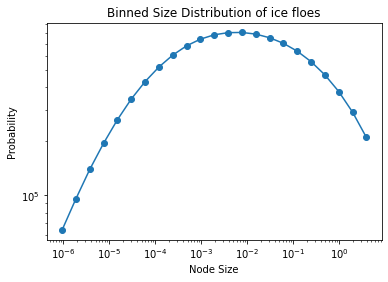

sizes:  [0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625, 0.00011920928955078125, 5.9604644775390625e-05, 2.9802322387695312e-05, 1.4901161193847656e-05]
counts:  [806256, 837815, 860281, 875866, 885791, 891382, 893955, 892901, 886629, 873075, 848888, 811413, 758743, 691548, 610844]


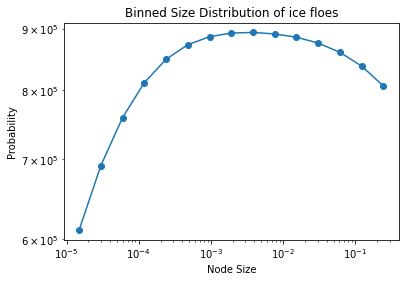

In [55]:
sizes= [1.4551915E-8, 2.910383E-8, 5.820766E-8, 1.1641532E-7, 2.3283064E-7, 4.656613E-7, 9.313226E-7, 1.8626451E-6, 3.7252903E-6, 7.4505806E-6, 1.4901161E-5, 2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 250.0]
counts=[4, 31, 128, 218, 485, 927, 1374, 2366, 4018, 6142, 10058, 15636, 22484, 31560, 43806, 55740, 69136, 80722, 87367, 90311, 88331, 80708, 67226, 52798, 37693, 24672, 14481, 7646, 3420, 1445, 551, 133, 51, 18, 1]
plot_size_distribution(sizes, counts)
log_binning_plot(sizes, counts, 5)
log_binning_plot(sizes, counts, 13)
log_binning_plot(sizes, counts, 21)

Case 5: splitRate = 0.7, weldRate = 0.1, times = 1,000,000
* sizes: [7.2759576E-9, 1.4551915E-8, 2.910383E-8, 5.820766E-8, 1.1641532E-7, 2.3283064E-7, 4.656613E-7, 9.313226E-7, 1.8626451E-6, 3.7252903E-6, 7.4505806E-6, 1.4901161E-5, 2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 250.0]<br> counts: [12, 29, 64, 198, 342, 697, 1393, 2958, 5885, 10995, 18495, 29972, 46857, 68214, 92897, 119182, 143463, 164177, 174312, 176443, 167993, 150913, 127162, 102146, 75022, 51683, 32471, 18594, 9190, 4202, 1668, 489, 177, 50, 14, 1]
* sizes: [25, 50, 75, 125, 250] <br> counts: [1798118, 177, 50, 14, 1]

sizes:  [250.0, 125.0, 62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625, 0.00011920928955078125, 5.9604644775390625e-05, 2.9802322387695312e-05, 1.4901161193847656e-05, 7.450580596923828e-06, 3.725290298461914e-06, 1.862645149230957e-06, 9.313225746154785e-07, 4.6566128730773926e-07, 2.3283064365386963e-07, 1.1641532182693481e-07, 5.820766091346741e-08, 2.9103830456733704e-08, 1.4551915228366852e-08, 7.275957614183426e-09]
counts:  [1, 14, 50, 177, 489, 1668, 4202, 9190, 18594, 32471, 51683, 75022, 102146, 127162, 150913, 167993, 176443, 174312, 164177, 143463, 119182, 92897, 68214, 46857, 29972, 18495, 10995, 5885, 2958, 1393, 697, 342, 198, 64, 29, 12]


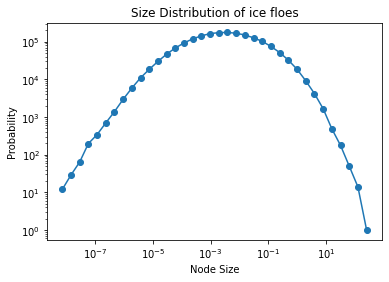

sizes:  [62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625, 0.00011920928955078125, 5.9604644775390625e-05, 2.9802322387695312e-05, 1.4901161193847656e-05, 7.450580596923828e-06, 3.725290298461914e-06, 1.862645149230957e-06, 9.313225746154785e-07, 4.6566128730773926e-07, 2.3283064365386963e-07, 1.1641532182693481e-07, 5.820766091346741e-08, 2.9103830456733704e-08]
counts:  [731, 2398, 6586, 15726, 34143, 66125, 116140, 186960, 279916, 388484, 506926, 623236, 724657, 796823, 833838, 826388, 777577, 694031, 587933, 470613, 357122, 256435, 174533, 112204, 68305, 39726, 21928, 11275, 5588, 2694, 1330, 645]


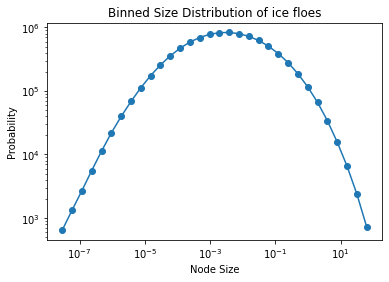

sizes:  [3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625, 0.00011920928955078125, 5.9604644775390625e-05, 2.9802322387695312e-05, 1.4901161193847656e-05, 7.450580596923828e-06, 3.725290298461914e-06, 1.862645149230957e-06, 9.313225746154785e-07, 4.6566128730773926e-07]
counts:  [295707, 422868, 573767, 741710, 917976, 1091799, 1254308, 1393569, 1503561, 1577864, 1613607, 1608781, 1563731, 1480080, 1363913, 1218885, 1053850, 878800, 705185, 541350, 398085, 278967, 186099, 117897]


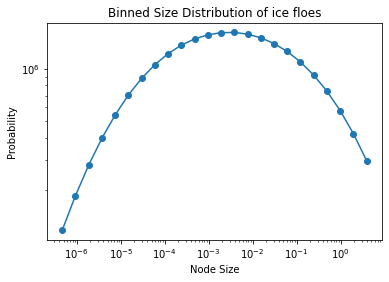

sizes:  [0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625, 0.00011920928955078125, 5.9604644775390625e-05, 2.9802322387695312e-05, 1.4901161193847656e-05, 7.450580596923828e-06]
counts:  [1519352, 1612248, 1680448, 1727255, 1757050, 1775056, 1784383, 1786066, 1779834, 1762633, 1730859, 1679518, 1604694, 1502612, 1375479, 1224578]


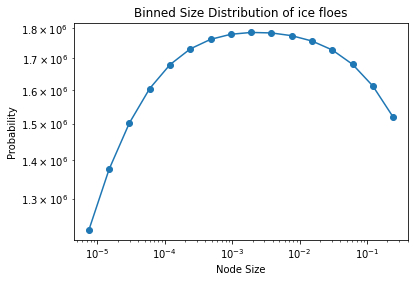

In [56]:
sizes =  [7.2759576E-9, 1.4551915E-8, 2.910383E-8, 5.820766E-8, 1.1641532E-7, 2.3283064E-7, 4.656613E-7, 9.313226E-7, 1.8626451E-6, 3.7252903E-6, 7.4505806E-6, 1.4901161E-5, 2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 250.0]
counts = [12, 29, 64, 198, 342, 697, 1393, 2958, 5885, 10995, 18495, 29972, 46857, 68214, 92897, 119182, 143463, 164177, 174312, 176443, 167993, 150913, 127162, 102146, 75022, 51683, 32471, 18594, 9190, 4202, 1668, 489, 177, 50, 14, 1]
plot_size_distribution(sizes, counts)
log_binning_plot(sizes, counts, 5)
log_binning_plot(sizes, counts, 13)
log_binning_plot(sizes, counts, 21)

Case 6: splitRate = 0.9, weldRate = 0.1, times = 500,000
* sizes: [7.2759576E-9, 1.4551915E-8, 2.910383E-8, 5.820766E-8, 1.1641532E-7, 2.3283064E-7, 4.656613E-7, 9.313226E-7, 1.8626451E-6, 3.7252903E-6, 7.4505806E-6, 1.4901161E-5, 2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0] <br> counts: [4, 15, 28, 100, 273, 601, 1247, 2306, 4255, 7546, 12258, 19427, 29188, 41391, 56052, 72510, 88170, 101710, 110993, 114727, 110976, 102314, 88981, 73018, 56869, 41236, 28200, 17302, 9372, 4677, 2128, 755, 205, 46, 11]
* sizes: [25, 50, 75, 125] <br> counts: [1198629, 205, 46, 11]

* Case 7.1: splitRate = 0.3, weldRate = 0.1, times = 500,000 <br>
sizes: [2.3283064E-7, 4.656613E-7, 9.313226E-7, 1.8626451E-6, 3.7252903E-6, 7.4505806E-6, 1.4901161E-5, 2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 250.0]<br>
counts: [28, 73, 252, 596, 1150, 1983, 2970, 4413, 6327, 8759, 12312, 15783, 20002, 23811, 26412, 28084, 28647, 26957, 23911, 20263, 15919, 11546, 7809, 4774, 2804, 1479, 681, 263, 66, 6, 1]


* Case 7.2: splitRate = 0.5, weldRate = 0.1, times = 500,000 <br>
sizes: [3.6379788E-9, 7.2759576E-9, 1.4551915E-8, 2.910383E-8, 5.820766E-8, 1.1641532E-7, 2.3283064E-7, 4.656613E-7, 9.313226E-7, 1.8626451E-6, 3.7252903E-6, 7.4505806E-6, 1.4901161E-5, 2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0]<br>
counts: [8, 14, 16, 59, 128, 216, 457, 890, 1341, 2309, 3823, 6223, 9499, 14434, 20175, 27189, 34588, 41551, 47794, 52932, 55579, 56042, 51963, 46188, 39134, 30276, 21764, 15018, 9461, 5548, 2871, 1505, 614, 211, 65, 14]

* Case 7.3: splitRate = 0.7, weldRate = 0.1, times = 500,000 <br>
sizes: [7.2759576E-9, 1.4551915E-8, 2.910383E-8, 5.820766E-8, 1.1641532E-7, 2.3283064E-7, 4.656613E-7, 9.313226E-7, 1.8626451E-6, 3.7252903E-6, 7.4505806E-6, 1.4901161E-5, 2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 250.0] <br>
counts: [4, 7, 34, 75, 115, 202, 545, 1153, 2270, 3967, 6754, 11347, 17753, 26025, 35580, 47553, 60143, 72566, 84155, 88922, 89192, 84333, 75367, 61330, 47314, 33488, 21659, 12536, 6679, 3206, 1475, 540, 184, 57, 6, 3]


* Case 7.4: splitRate = 0.9, weldRate = 0.1, times = 500,000 <br>
sizes: [7.2759576E-9, 1.4551915E-8, 2.910383E-8, 5.820766E-8, 1.1641532E-7, 2.3283064E-7, 4.656613E-7, 9.313226E-7, 1.8626451E-6, 3.7252903E-6, 7.4505806E-6, 1.4901161E-5, 2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 250.0] <br>
counts: [8, 26, 93, 195, 541, 1219, 2090, 3588, 6531, 10561, 16402, 24621, 35377, 49528, 65002, 80586, 97214, 108681, 116986, 117149, 110745, 95908, 78222, 61174, 44607, 30602, 20050, 11862, 6518, 3179, 1464, 528, 166, 51, 5, 4]


max division time: 20
splitRate = 0.3, weldRate = 0.1, times = 500,000
sizes:  [125.0, 62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125]
counts:  [11, 66, 233, 671, 1484, 3201, 6192, 10657, 16256, 21812, 27620, 32330, 35353, 35758, 33826, 30144, 26555]


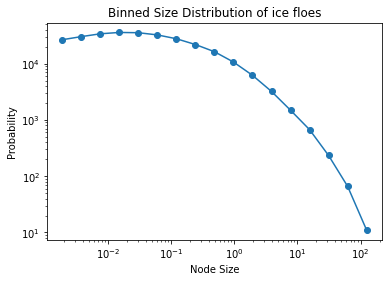

Case 7.2: splitRate = 0.5, weldRate = 0.1, times = 500,000
sizes:  [500.0, 250.0, 125.0, 62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125]
counts:  [1, 1, 12, 30, 119, 433, 1303, 2889, 5531, 10281, 17028, 25587, 35802, 47658, 59198, 69742, 77993, 81606, 83913]


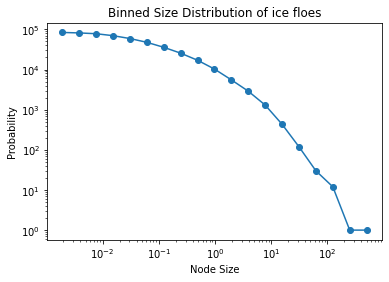

Case 7.3: splitRate = 0.7, weldRate = 0.1, times = 500,000
sizes:  [250.0, 125.0, 62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125]
counts:  [3, 13, 22, 142, 618, 1776, 4384, 8798, 15730, 26472, 40877, 58541, 77368, 94654, 108071, 116520, 117197, 114641]


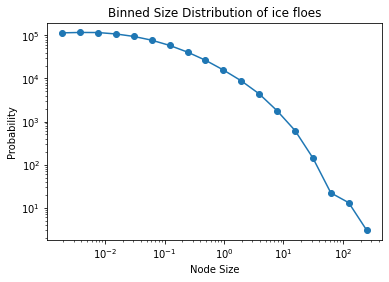

Case 7.4: splitRate = 0.9, weldRate = 0.1, times = 500,000
sizes:  [125.0, 62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125]
counts:  [5, 53, 190, 789, 2478, 5983, 13643, 26488, 44956, 68792, 93809, 117914, 135163, 145230, 146488, 139002, 130286]


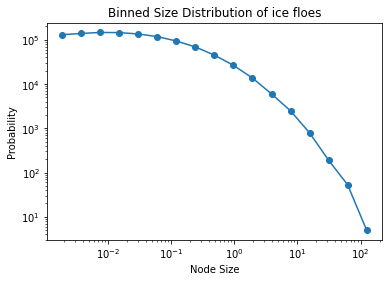

In [7]:
print("max division time: 20")
print("splitRate = 0.3, weldRate = 0.1, times = 500,000")
sizes= [0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0]
counts= [26555, 30144, 33826, 35758, 35353, 32330, 27620, 21812, 16256, 10657, 6192, 3201, 1484, 671, 233, 66, 11]
log_binning_plot(sizes, counts, 1)
print("Case 7.2: splitRate = 0.5, weldRate = 0.1, times = 500,000")
sizes= [0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 250.0, 500.0]
counts= [83913, 81606, 77993, 69742, 59198, 47658, 35802, 25587, 17028, 10281, 5531, 2889, 1303, 433, 119, 30, 12, 1, 1]
log_binning_plot(sizes, counts, 1)
print("Case 7.3: splitRate = 0.7, weldRate = 0.1, times = 500,000")
sizes= [0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 250.0]
counts= [114641, 117197, 116520, 108071, 94654, 77368, 58541, 40877, 26472, 15730, 8798, 4384, 1776, 618, 142, 22, 13, 3]
log_binning_plot(sizes, counts, 1)
print("Case 7.4: splitRate = 0.9, weldRate = 0.1, times = 500,000")
sizes = [0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0]
counts=  [130286, 139002, 146488, 145230, 135163, 117914, 93809, 68792, 44956, 26488, 13643, 5983, 2478, 789, 190, 53, 5]
log_binning_plot(sizes, counts, 1)

sizes:  [31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125]
counts:  [2465, 5655, 11781, 22205, 37790, 58118, 82537, 108675, 133371, 152873, 164887, 167411, 161636]


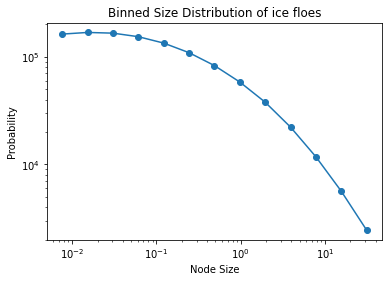

Case 7.2: splitRate = 0.5, weldRate = 0.1, times = 500,000
sizes:  [125.0, 62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125]
counts:  [163, 595, 1897, 4774, 10275, 20437, 37032, 61316, 94229, 136356, 185273, 237987, 290393, 336197, 372452]


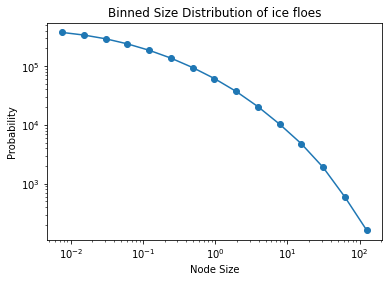

Case 7.3: splitRate = 0.7, weldRate = 0.1, times = 500,000
sizes:  [62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125]
counts:  [798, 2571, 6942, 15718, 31306, 57160, 96261, 150418, 218988, 297912, 379511, 455154, 513810, 551083]


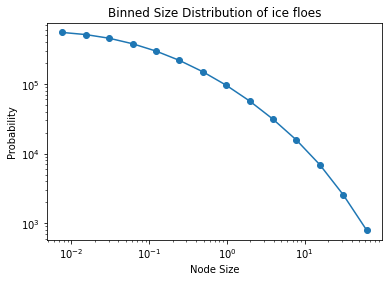

Case 7.4: splitRate = 0.9, weldRate = 0.1, times = 500,000
sizes:  [31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125]
counts:  [3515, 9493, 23083, 49381, 93548, 159862, 247688, 351959, 460634, 560908, 638604, 683797, 696169]


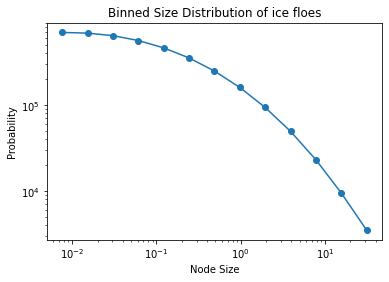

In [12]:
sizes= [0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0]
counts= [26555, 30144, 33826, 35758, 35353, 32330, 27620, 21812, 16256, 10657, 6192, 3201, 1484, 671, 233, 66, 11]
log_binning_plot(sizes, counts, 5)
print("Case 7.2: splitRate = 0.5, weldRate = 0.1, times = 500,000")
sizes= [0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 250.0, 500.0]
counts= [83913, 81606, 77993, 69742, 59198, 47658, 35802, 25587, 17028, 10281, 5531, 2889, 1303, 433, 119, 30, 12, 1, 1]
log_binning_plot(sizes, counts, 5)
print("Case 7.3: splitRate = 0.7, weldRate = 0.1, times = 500,000")
sizes= [0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 250.0]
counts= [114641, 117197, 116520, 108071, 94654, 77368, 58541, 40877, 26472, 15730, 8798, 4384, 1776, 618, 142, 22, 13, 3]
log_binning_plot(sizes, counts, 5)
print("Case 7.4: splitRate = 0.9, weldRate = 0.1, times = 500,000")
sizes = [0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0]
counts=  [130286, 139002, 146488, 145230, 135163, 117914, 93809, 68792, 44956, 26488, 13643, 5983, 2478, 789, 190, 53, 5]
log_binning_plot(sizes, counts, 5)

max division time: 30
splitRate = 0.3, weldRate = 0.1, times = 500,000
sizes:  [250.0, 125.0, 62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625, 0.00011920928955078125, 5.9604644775390625e-05, 2.9802322387695312e-05, 1.4901161193847656e-05, 7.450580596923828e-06, 3.725290298461914e-06, 1.862645149230957e-06]
counts:  [5, 2, 51, 194, 490, 1281, 2660, 4682, 7623, 11363, 15462, 19714, 23398, 25993, 28019, 27637, 27350, 24104, 20717, 17167, 13569, 10107, 7156, 4611, 2842, 1628, 953, 435]


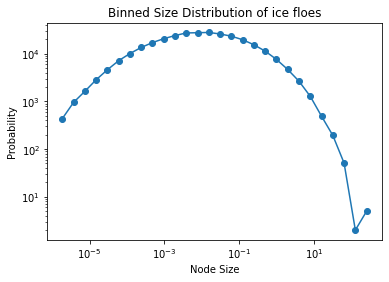

Case 7.2: splitRate = 0.5, weldRate = 0.1, times = 500,000
sizes:  [250.0, 125.0, 62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625, 0.00011920928955078125, 5.9604644775390625e-05, 2.9802322387695312e-05, 1.4901161193847656e-05, 7.450580596923828e-06, 3.725290298461914e-06, 1.862645149230957e-06]
counts:  [1, 14, 61, 217, 571, 1109, 2293, 4071, 6926, 11278, 17885, 26288, 35991, 44798, 52831, 57433, 59970, 57159, 51939, 44627, 36662, 28060, 20733, 14932, 9858, 6368, 4005, 2371]


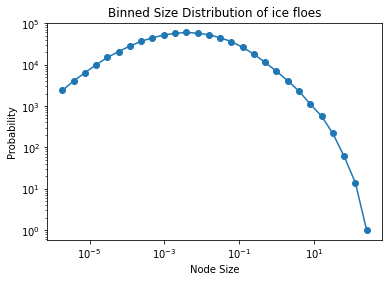

Case 7.3: splitRate = 0.7, weldRate = 0.1, times = 500,000
sizes:  [250.0, 125.0, 62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625, 0.00011920928955078125, 5.9604644775390625e-05, 2.9802322387695312e-05, 1.4901161193847656e-05, 7.450580596923828e-06, 3.725290298461914e-06, 1.862645149230957e-06]
counts:  [4, 4, 53, 164, 485, 1570, 3728, 7344, 13395, 22364, 33780, 48601, 63435, 76444, 87433, 93603, 94045, 86472, 75803, 61168, 45397, 32783, 21463, 13587, 8315, 4479, 2360, 1196]


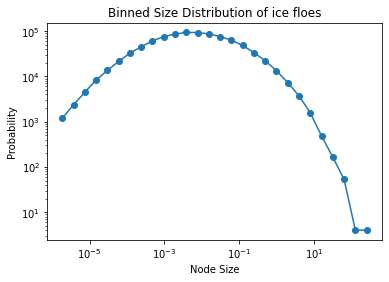

Case 7.4: splitRate = 0.9, weldRate = 0.1, times = 500,000
sizes:  [125.0, 62.5, 31.25, 15.625, 7.8125, 3.90625, 1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625, 0.00011920928955078125, 5.9604644775390625e-05, 2.9802322387695312e-05, 1.4901161193847656e-05, 7.450580596923828e-06, 3.725290298461914e-06, 1.862645149230957e-06]
counts:  [8, 63, 229, 681, 1803, 4429, 9013, 16997, 28370, 44370, 63499, 83144, 100974, 114778, 121486, 120606, 110908, 95835, 77487, 58996, 43836, 31287, 22655, 15928, 11291, 7924, 5544]


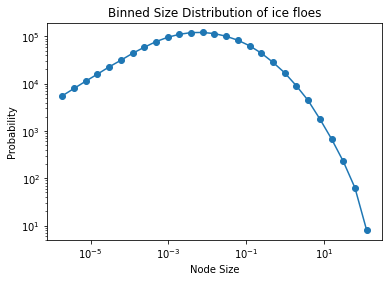

In [9]:
print("max division time: 30")
print("splitRate = 0.3, weldRate = 0.1, times = 500,000")
sizes= [1.8626451E-6, 3.7252903E-6, 7.4505806E-6, 1.4901161E-5, 2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 250.0]
counts= [435, 953, 1628, 2842, 4611, 7156, 10107, 13569, 17167, 20717, 24104, 27350, 27637, 28019, 25993, 23398, 19714, 15462, 11363, 7623, 4682, 2660, 1281, 490, 194, 51, 2, 5]
log_binning_plot(sizes, counts, 1)
print("Case 7.2: splitRate = 0.5, weldRate = 0.1, times = 500,000")
sizes= [1.8626451E-6, 3.7252903E-6, 7.4505806E-6, 1.4901161E-5, 2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 250.0]
counts= [2371, 4005, 6368, 9858, 14932, 20733, 28060, 36662, 44627, 51939, 57159, 59970, 57433, 52831, 44798, 35991, 26288, 17885, 11278, 6926, 4071, 2293, 1109, 571, 217, 61, 14, 1]
log_binning_plot(sizes, counts, 1)
print("Case 7.3: splitRate = 0.7, weldRate = 0.1, times = 500,000")
sizes= [1.8626451E-6, 3.7252903E-6, 7.4505806E-6, 1.4901161E-5, 2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 250.0]
counts= [1196, 2360, 4479, 8315, 13587, 21463, 32783, 45397, 61168, 75803, 86472, 94045, 93603, 87433, 76444, 63435, 48601, 33780, 22364, 13395, 7344, 3728, 1570, 485, 164, 53, 4, 4]
log_binning_plot(sizes, counts, 1)
print("Case 7.4: splitRate = 0.9, weldRate = 0.1, times = 500,000")
sizes= [1.8626451E-6, 3.7252903E-6, 7.4505806E-6, 1.4901161E-5, 2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0]
counts= [5544, 7924, 11291, 15928, 22655, 31287, 43836, 58996, 77487, 95835, 110908, 120606, 121486, 114778, 100974, 83144, 63499, 44370, 28370, 16997, 9013, 4429, 1803, 681, 229, 63, 8]
log_binning_plot(sizes, counts, 1)

max division time: 30
splitRate = 0.3, weldRate = 0.1, times = 500,000
sizes:  [1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625]
counts:  [140937, 168569, 195917, 219970, 240493, 257170, 269458, 276905, 279379, 276367, 267846, 254012, 235251, 212288]


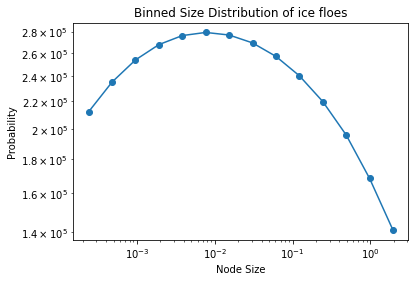

Case 7.2: splitRate = 0.5, weldRate = 0.1, times = 500,000
sizes:  [1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625]
counts:  [204334, 261766, 321722, 378820, 430542, 474598, 510151, 535918, 552580, 560586, 559166, 547649, 525366, 491746]


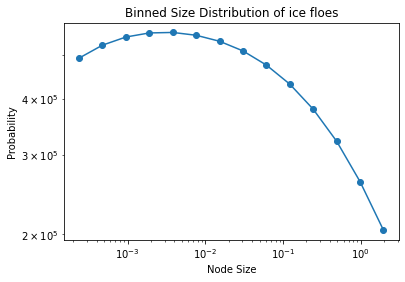

Case 7.3: splitRate = 0.7, weldRate = 0.1, times = 500,000
sizes:  [1.953125, 0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625]
counts:  [358804, 452403, 546444, 632863, 708502, 769185, 813012, 842067, 856186, 856378, 842329, 813028, 766787, 704548]


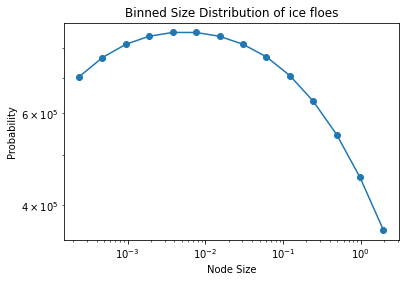

Case 7.4: splitRate = 0.9, weldRate = 0.1, times = 500,000
sizes:  [0.9765625, 0.48828125, 0.244140625, 0.1220703125, 0.06103515625, 0.030517578125, 0.0152587890625, 0.00762939453125, 0.003814697265625, 0.0019073486328125, 0.00095367431640625, 0.000476837158203125, 0.0002384185791015625]
counts:  [589844, 710442, 821287, 916893, 993699, 1050892, 1090299, 1112573, 1118231, 1105789, 1072710, 1017135, 939535]


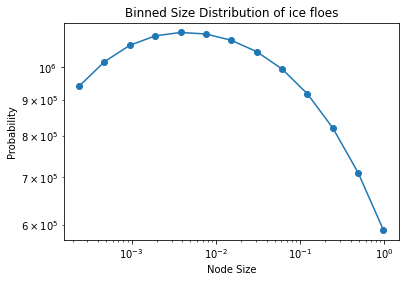

In [11]:
print("max division time: 30")
print("splitRate = 0.3, weldRate = 0.1, times = 500,000")
sizes= [1.8626451E-6, 3.7252903E-6, 7.4505806E-6, 1.4901161E-5, 2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 250.0]
counts= [435, 953, 1628, 2842, 4611, 7156, 10107, 13569, 17167, 20717, 24104, 27350, 27637, 28019, 25993, 23398, 19714, 15462, 11363, 7623, 4682, 2660, 1281, 490, 194, 51, 2, 5]
log_binning_plot(sizes, counts, 15)
print("Case 7.2: splitRate = 0.5, weldRate = 0.1, times = 500,000")
sizes= [1.8626451E-6, 3.7252903E-6, 7.4505806E-6, 1.4901161E-5, 2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 250.0]
counts= [2371, 4005, 6368, 9858, 14932, 20733, 28060, 36662, 44627, 51939, 57159, 59970, 57433, 52831, 44798, 35991, 26288, 17885, 11278, 6926, 4071, 2293, 1109, 571, 217, 61, 14, 1]
log_binning_plot(sizes, counts, 15)
print("Case 7.3: splitRate = 0.7, weldRate = 0.1, times = 500,000")
sizes= [1.8626451E-6, 3.7252903E-6, 7.4505806E-6, 1.4901161E-5, 2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0, 250.0]
counts= [1196, 2360, 4479, 8315, 13587, 21463, 32783, 45397, 61168, 75803, 86472, 94045, 93603, 87433, 76444, 63435, 48601, 33780, 22364, 13395, 7344, 3728, 1570, 485, 164, 53, 4, 4]
log_binning_plot(sizes, counts, 15)
print("Case 7.4: splitRate = 0.9, weldRate = 0.1, times = 500,000")
sizes= [1.8626451E-6, 3.7252903E-6, 7.4505806E-6, 1.4901161E-5, 2.9802322E-5, 5.9604645E-5, 1.1920929E-4, 2.3841858E-4, 4.7683716E-4, 9.536743E-4, 0.0019073486, 0.0038146973, 0.0076293945, 0.015258789, 0.030517578, 0.061035156, 0.12207031, 0.24414062, 0.48828125, 0.9765625, 1.953125, 3.90625, 7.8125, 15.625, 31.25, 62.5, 125.0]
counts= [5544, 7924, 11291, 15928, 22655, 31287, 43836, 58996, 77487, 95835, 110908, 120606, 121486, 114778, 100974, 83144, 63499, 44370, 28370, 16997, 9013, 4429, 1803, 681, 229, 63, 8]
log_binning_plot(sizes, counts, 15)